In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

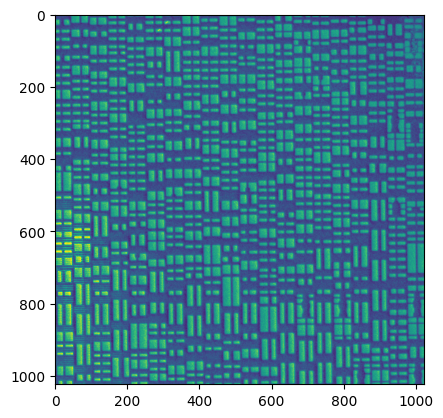

In [6]:
data_path = os.path.join( os.getcwd(), 'images' )
layout_name = "4_D6.tif"  
layout_path = os.path.join( data_path, layout_name)
image = Image.open(layout_path)
img_arr = np.array(image)
# print(img_arr.dtype)
plt.imshow(img_arr)
plt.show()

In [ ]:
data_path = os.path.join( os.path.dirname(os.getcwd()), 'Xilinx_28nm' )
layout_name = "D4.tif"  
layout_path = os.path.join( data_path, 'Set 25', layout_name)
image = Image.open(layout_path)

im_col_length, im_row_length = image.size
num_window_row = 5
num_window_col = 5
win_row_length = int(im_row_length/num_window_row)
win_col_length = int(im_col_length/num_window_col)


for win_row_index in range(0,num_window_row):
    for win_col_index in range(0,num_window_col):
        start_row = win_row_index * win_row_length
        end_row = min((win_row_index + 1) * win_row_length, im_row_length)
        start_col = win_col_index * win_col_length
        end_col = min((win_col_index + 1) * win_col_length, im_col_length)
        current_window = np.array(image.crop(( start_col, start_row, end_col, end_row )))
        
        img = ( (current_window/65353)*255).astype(np.uint8) 
        denoised_img = cv2.fastNlMeansDenoising(img,None,30,11,33)
        plt.imshow(denoised_img, cmap = 'gray')
        plt.show()
        


In [8]:
data_path = os.path.join( os.path.dirname(os.getcwd()), 'Xilinx_28nm' )
layout_name = "D4.tif"  
set_number = 25
layout_path = os.path.join( data_path, f'Set {set_number}', layout_name)
image = Image.open(layout_path)

start_row = 0
end_row = 1000
start_col = 0
end_col = 1000
current_window = np.array(image.crop(( start_col, start_row, end_col, end_row )))

img = ( (current_window/65353)*255).astype(np.uint8) 
denoised_img = cv2.fastNlMeansDenoising(img,None,30,11,33)
# plt.imshow(denoised_img, cmap = 'gray')
# plt.show()

output_path = os.path.join(data_path, 'Denoised')
os.makedirs(output_path, exist_ok=True)

for h in range(30,45,1):
    for t_win in range(7,10,2):
        for s_win in range(9, 41, 2):
            denoised_img = cv2.fastNlMeansDenoising(img,None,h,t_win,s_win)
            cropped = denoised_img[0:900,0:900]
            output_image_path = os.path.join(output_path, f'set_{set_number}_' + 'D4' +f'_{h}_{t_win}_{s_win}'+'.jpg' )
            cv2.imwrite(output_image_path, cropped)
            # cropped = binarized(cropped)
            # output_image_path = os.path.join(output_path, f'set_{set_number}_' + 'D4' +f'_{h}_{t_win}_{s_win}'+'_bin.jpg' )
            # cv2.imwrite(output_image_path, cropped)




# im_col_length, im_row_length = denoised_img.shape
# num_window_row = 5
# num_window_col = 5
# win_row_length = int(im_row_length/num_window_row)
# win_col_length = int(im_col_length/num_window_col)


# for win_row_index in range(0,num_window_row):
#     for win_col_index in range(0,num_window_col):
#         start_row = win_row_index * win_row_length
#         end_row = min((win_row_index + 1) * win_row_length, im_row_length)
#         start_col = win_col_index * win_col_length
#         end_col = min((win_col_index + 1) * win_col_length, im_col_length)
#         current_window = np.array(image.crop(( start_col, start_row, end_col, end_row )))
        
#         img = ( (current_window/65353)*255).astype(np.uint8) 
#         denoised_img = cv2.fastNlMeansDenoising(img,None,30,11,33)
#         plt.imshow(denoised_img, cmap = 'gray')
#         plt.show()


In [5]:
def denoised(img):
    denoised_img = cv2.fastNlMeansDenoising(img,None,30,7,51)
#     cv2.imwrite(os.path.join(output_path, 'denoised.jpg'),denoised_img)
    return denoised_img

def binarized(img, threshold = -1):
    th, img_th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # th, img_th = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
    # print(' OT threshold: ',th)
    #print('threshold using: ',th+10)
    th, img_th = cv2.threshold(img, th+20, 255 , cv2.THRESH_BINARY)
    #cv2.imwrite(os.path.join(output_path,'binarized.jpg'),img_th)
    #print('threshold using: ',th)
    return img_th

def my_preprocessing(img):
    img_denoised = denoised(img)
    img_bin, th = binarized(img_denoised)
    return img_bin